#  Day 21 Assignment 

# Linear Regression

### Linear Regression .xls

- Price is Dependent Variable
- Want 5 models : 1.Apply LR for price and square feet ,2.Price and bedroom. ... Similary for all columns And then For all

___

___

# Linear Regression

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [58]:
os.chdir("C:/Users/Abhishek/Desktop/UpGrade/Day 21 Logistic regression")

In [59]:
data=pd.read_excel("Linear Regression.xlsx")
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [60]:
data.shape

(21613, 5)

In [61]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [62]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [63]:
data.corr()

# Based on correlation the variables having most impact on Price in order are : sqft_living,bathrooms,bedrooms,floors

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


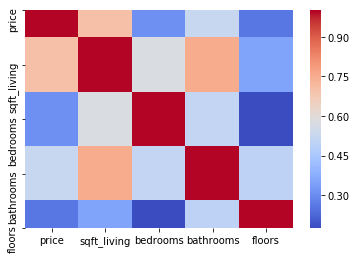

In [64]:
sns.heatmap(data.corr(),cmap="coolwarm")

In [65]:
data.isna().sum()
#No missing value

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [66]:
# Check Skewness
data.skew()

price          4.024069
sqft_living    1.471555
bedrooms       1.974300
bathrooms      0.511108
floors         0.616177
dtype: float64

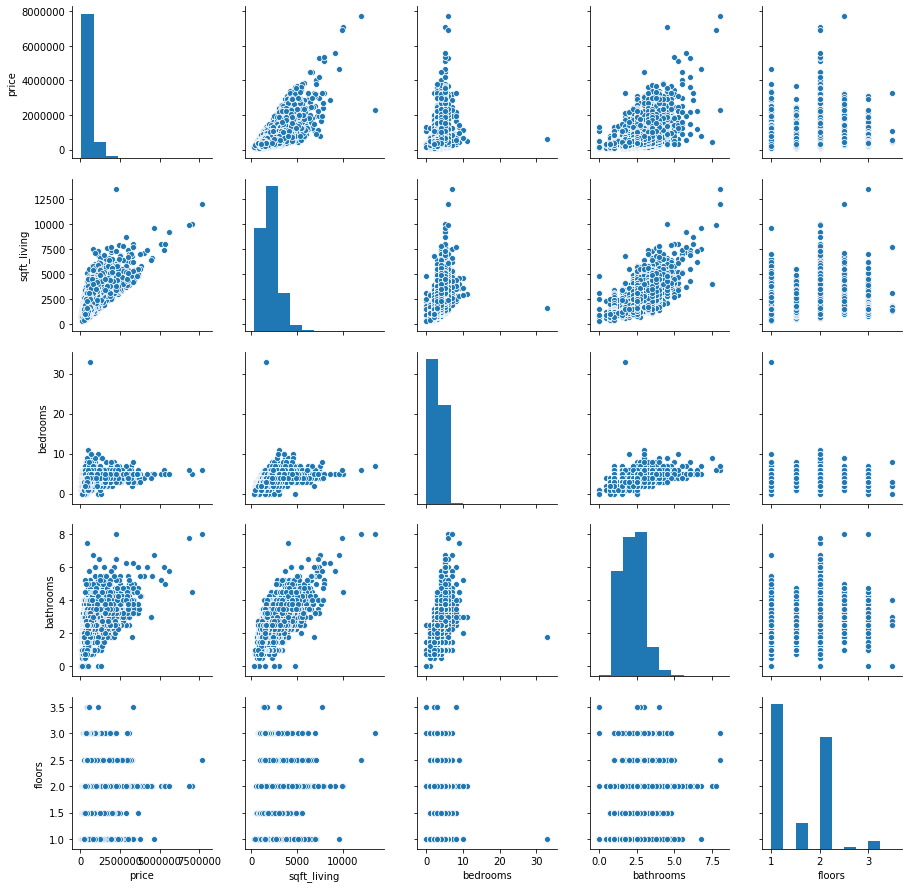

In [67]:
sns.pairplot(data)

# There is only SOME linear relationship with Price for Sqdt_living and Bathroom. Rest Variables wont be much usefull in Linear Regression.

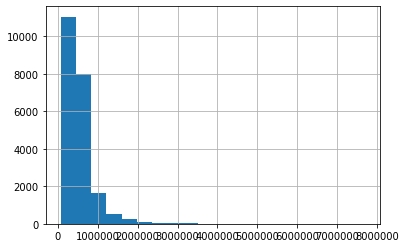

In [68]:
data["price"].hist(bins=20)

## Model 1 : All Features

In [69]:
#Train test Split :
x=data.drop("price",axis=1)
y=data["price"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 4)
(4323, 4)
(17290,)
(4323,)


In [70]:
#Initialize model
lin_reg = LinearRegression()

#Train the Model
lin_reg.fit(X_train,y_train)

# Check Slope of our line (i.e m from y=mx+c)
print(lin_reg.coef_) # value for each column

# Check Constant of our line (i.e c from y=mx+c)
print("\n",lin_reg.intercept_)

[   313.19378504 -56600.74916997   5910.55508513   2453.13646507]

 65340.251323104545


In [71]:
#Test the model
y_pred = lin_reg.predict(X_test)

In [72]:
from sklearn.metrics import r2_score,mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
r2 = r2_score(y_test , y_pred)

print(" RMSE value is :",RMSE)
print("\n R2 value is :",r2)

 RMSE value is : 244892.3041280654

 R2 value is : 0.49571065104477097


- R2 : 0.49 (how ,uch independent Variabl will affect dependent variable)
- 
- 

# Model 2 : only sqft_living

In [73]:
#Train test Split :
x=data["sqft_living"]
x=np.array(x).reshape(-1, 1)
y=data["price"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 1)
(4323, 1)
(17290,)
(4323,)


In [74]:
#Initialize model
lin_reg = LinearRegression()

#Train the Model
lin_reg.fit(X_train,y_train)

# Check Slope of our line (i.e m from y=mx+c)
print(lin_reg.coef_) # value for each column

# Check Constant of our line (i.e c from y=mx+c)
print("\n",lin_reg.intercept_)

[283.96855737]

 -48257.06345556199


In [75]:
#Test the model
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
r2 = r2_score(y_test , y_pred)

print(" RMSE :",RMSE)
print("\n R2 value",r2)

 RMSE : 248879.06143647007

 R2 value 0.47915770799654933


# Model 3 : only Bathroom

In [76]:
#Train test Split :
x=data["bathrooms"]
x=np.array(x).reshape(-1, 1)
y=data["price"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 1)
(4323, 1)
(17290,)
(4323,)


In [77]:
#Initialize model
lin_reg = LinearRegression()

#Train the Model
lin_reg.fit(X_train,y_train)

# Check Slope of our line (i.e m from y=mx+c)
print(lin_reg.coef_) # value for each column

# Check Constant of our line (i.e c from y=mx+c)
print("\n",lin_reg.intercept_)

[253263.96384055]

 6313.083478821907


In [78]:
#Test the model
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
r2 = r2_score(y_test , y_pred)

print(" RMSE :",RMSE)
print("\n R2 value",r2)

 RMSE : 293733.1147146452

 R2 value 0.2745034662728696


# Model 4 : only Bedrooms

In [79]:
#Train test Split :
x=data['bedrooms']
x=np.array(x).reshape(-1, 1)
y=data["price"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 1)
(4323, 1)
(17290,)
(4323,)


In [80]:
#Initialize model
lin_reg = LinearRegression()

#Train the Model
lin_reg.fit(X_train,y_train)

# Check Slope of our line (i.e m from y=mx+c)
print(lin_reg.coef_) # value for each column

# Check Constant of our line (i.e c from y=mx+c)
print("\n",lin_reg.intercept_)

[123535.45915908]

 126751.84604780824


In [81]:
#Test the model
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
r2 = r2_score(y_test , y_pred)

print(" RMSE :",RMSE)
print("\n R2 value",r2)

 RMSE : 330690.0478733202

 R2 value 0.08045757572566947


# Model 5 : only Floors

In [82]:
#Train test Split :
x=data['bedrooms']
x=np.array(x).reshape(-1, 1)
y=data["price"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 1)
(4323, 1)
(17290,)
(4323,)


In [83]:
#Initialize model
lin_reg = LinearRegression()

#Train the Model
lin_reg.fit(X_train,y_train)

# Check Slope of our line (i.e m from y=mx+c)
print(lin_reg.coef_) # value for each column

# Check Constant of our line (i.e c from y=mx+c)
print("\n",lin_reg.intercept_)

[123535.45915908]

 126751.84604780824


In [84]:
#Test the model
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
r2 = r2_score(y_test , y_pred)

print(" RMSE :",RMSE)
print("\n R2 value",r2)

 RMSE : 330690.0478733202

 R2 value 0.08045757572566947


---

---

# Logistic Regression
### Bank Personal loan modelling

- PersonalLoan is Dependent Variable
- Check with variable is contributing more towards Deciding Approval of loan

In [143]:
data_bank = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)
data_bank.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [144]:
data_bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [145]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [146]:
data_bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [147]:
data_bank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [148]:
data_bank.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598457
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [149]:
data_bank.corr()

# CCAvg,Education,Mortgage,CD Account Have some what correlation.
# No other have any significant correlation

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


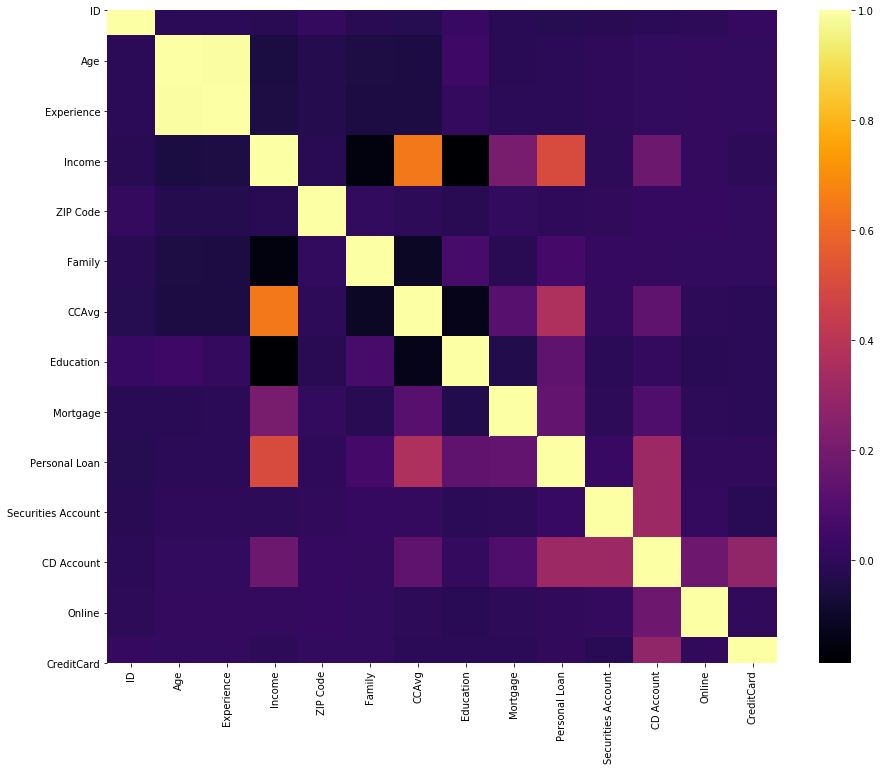

In [150]:
plt.figure(figsize=(15,12))
sns.heatmap(data_bank.corr(),cmap="inferno")

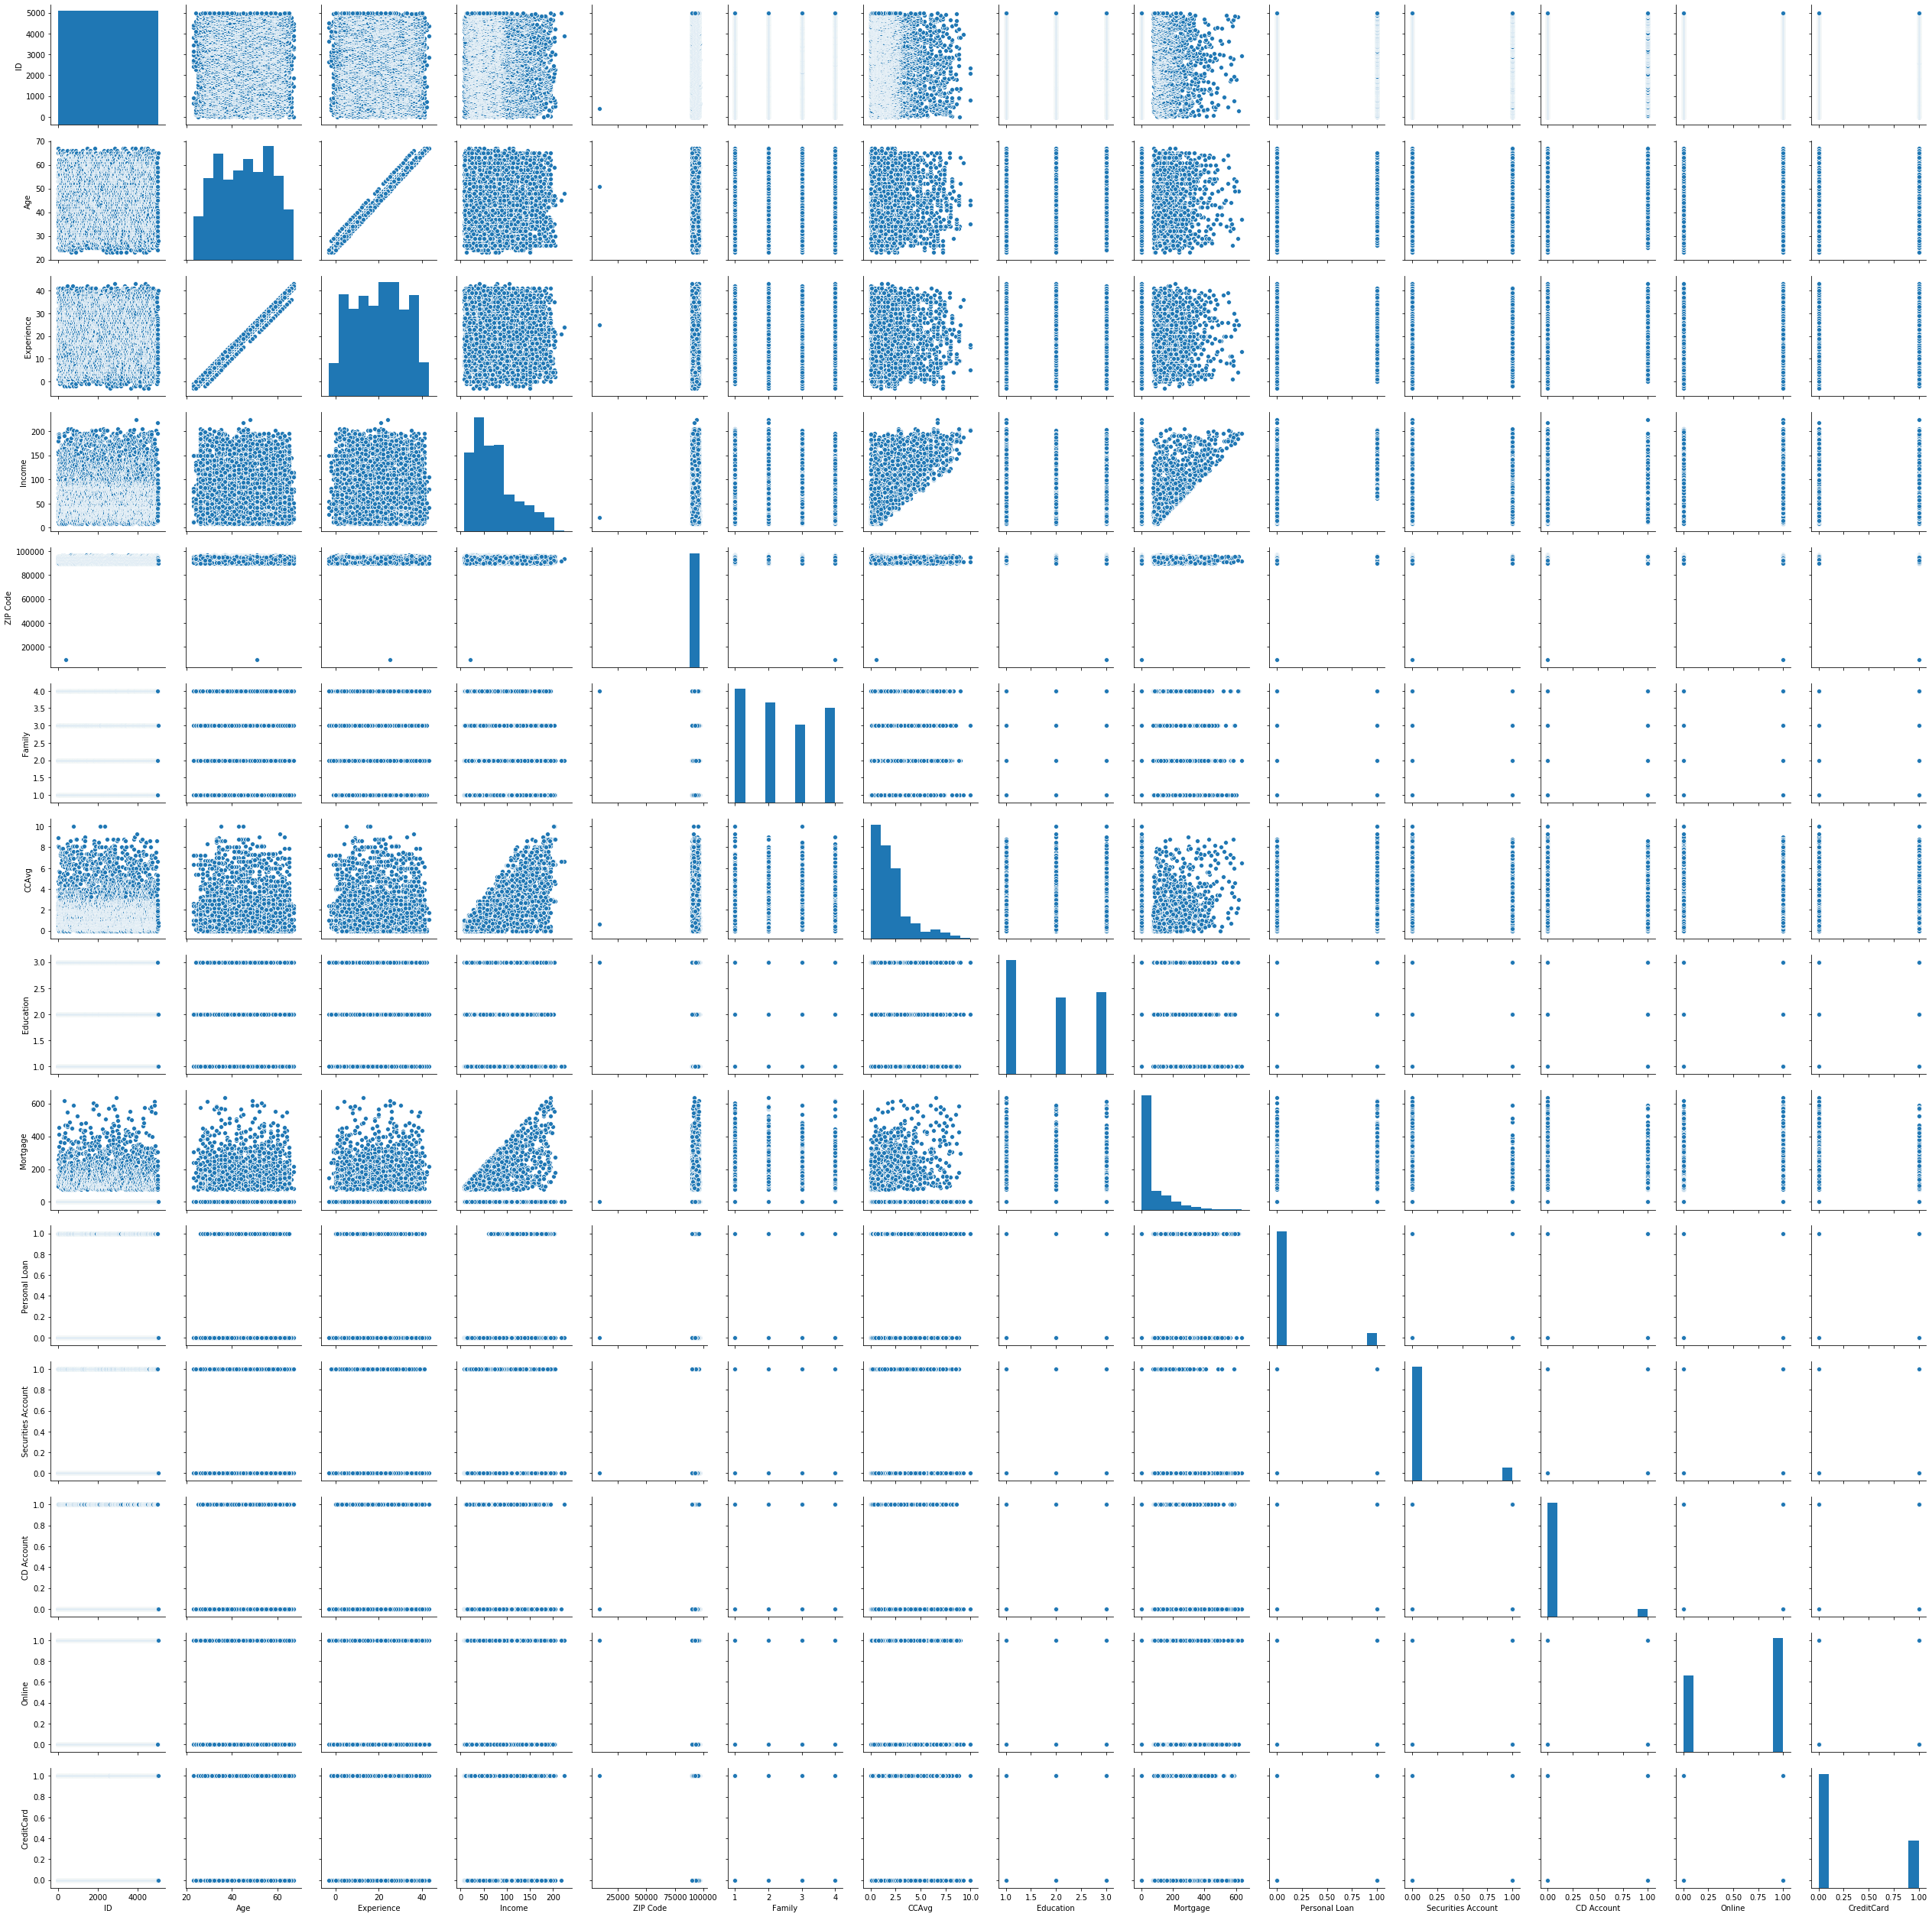

In [151]:
sns.pairplot(data_bank)

## Split the Data

In [152]:
X_bank=data_bank.drop('Personal Loan',axis=1)
y_bank=data_bank['Personal Loan']
print(X_bank.shape)
print(y_bank.shape)

(5000, 13)
(5000,)


In [153]:
X_train,X_test,y_train,y_test = train_test_split(X_bank,y_bank,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 13)
(1000, 13)
(4000,)
(1000,)


# Logistic Model 1 (All Features)

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,auc
from sklearn.metrics import plot_confusion_matrix


logistic_reg = LogisticRegression()

logistic_reg.fit(X_train,y_train)

y_pred = logistic_reg.predict(X_test)

In [155]:
confusion_matrix(y_test,y_pred)

array([[883,  27],
       [ 57,  33]], dtype=int64)

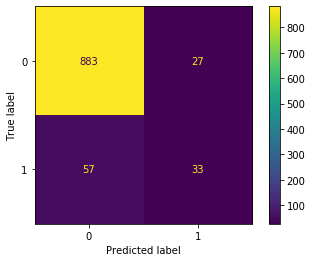

In [156]:
plot_confusion_matrix(logistic_reg,X_test,y_test)

In [157]:
print("Accuracy score is : ",accuracy_score(y_test,y_pred))
print("precision score is : ",precision_score(y_test,y_pred))
print("recall_score is : ",recall_score(y_test,y_pred))
print("f1_score is : ",f1_score(y_test,y_pred))
print("AUC score is : ",roc_auc_score(y_test,y_pred))
#print("",)

Accuracy score is :  0.916
precision score is :  0.55
recall_score is :  0.36666666666666664
f1_score is :  0.43999999999999995
AUC score is :  0.6684981684981685


# Logistic Model 2 (High corr() Features only)

In [159]:
X_model2 = pd.DataFrame(data=data_bank , columns=["CCAvg","Education","Mortgage","CD Account"])
y_model2 = data_bank['Personal Loan']
print(X_model2.shape)
print(y_model2.shape)

(5000, 4)
(5000,)


In [160]:
X_model2.head(2)

,CCAvg,Education,Mortgage,CD Account
0,1.6,1,0,0
1,1.5,1,0,0


In [161]:
X_trainM2,X_testM2,y_trainM2,y_testM2 = train_test_split(X_model2,y_model2,test_size=0.2,random_state=0)

print(X_trainM2.shape)
print(X_testM2.shape)
print(y_trainM2.shape)
print(y_testM2.shape)

(4000, 4)
(1000, 4)
(4000,)
(1000,)


In [162]:
logistic_regM2 = LogisticRegression()

logistic_regM2.fit(X_trainM2,y_trainM2)

y_predM2 = logistic_regM2.predict(X_testM2)

In [167]:
confusion_matrix(y_testM2,y_predM2)

array([[898,  12],
       [ 56,  34]], dtype=int64)

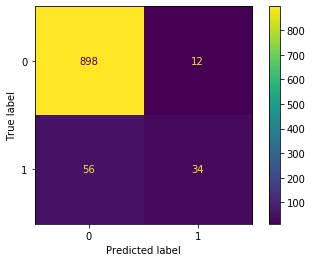

In [168]:
plot_confusion_matrix(logistic_regM2,X_testM2,y_testM2)

In [169]:
print("Accuracy score is : ",accuracy_score(y_test,y_pred))
print("precision score is : ",precision_score(y_test,y_pred))
print("recall_score is : ",recall_score(y_test,y_pred))
print("f1_score is : ",f1_score(y_test,y_pred))
print("AUC score is : ",roc_auc_score(y_test,y_pred))

Accuracy score is :  0.916
precision score is :  0.55
recall_score is :  0.36666666666666664
f1_score is :  0.43999999999999995
AUC score is :  0.6684981684981685


## Model 1

-  CCAvg,Education,Mortgage,CD Account Have some what correlation.
-  Others not really vorrelated with the model.
-  precision_score,recall_score,f1_score,roc_auc_score,auc Values not Good either


## Model 2 (High corr() Features only)


-  CCAvg,Education,Mortgage,CD Account Have some what correlation.
-  Others Features not included.
-  precision_score,recall_score,f1_score,roc_auc_score,auc Values are slightly better but not very Good either

# The main issue is for Regression to work the data should be Almost/Perfectly linearly separable, but in our case it is not, So this algorithm wont give best results